In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Any results you write to the current directory are saved as output.

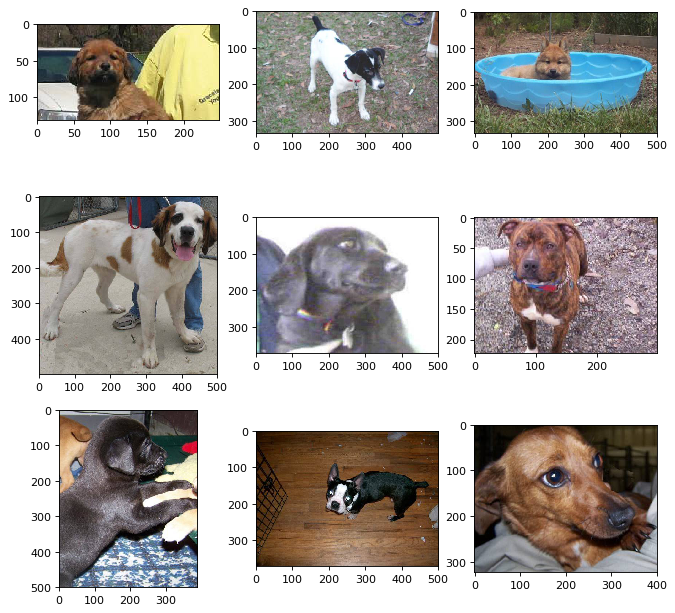

In [2]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# define location of dataset

# plot first few images

dogs = [
    "/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.462.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.523.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.520.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.974.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.764.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.268.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.451.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.931.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.509.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.387.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.463.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.278.jpg",

]


# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = dogs[i]
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

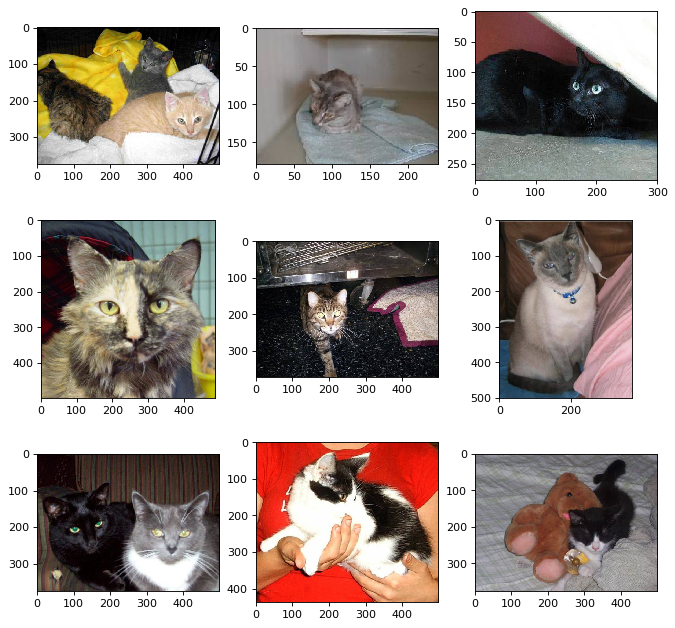

In [3]:

cats = [
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.763.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.972.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.700.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.10.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.994.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.540.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.182.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.185.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.369.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.939.jpg",
"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/cats/cat.950.jpg",


]
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = cats[i]
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
> 90.900


NameError: name 'sys' is not defined

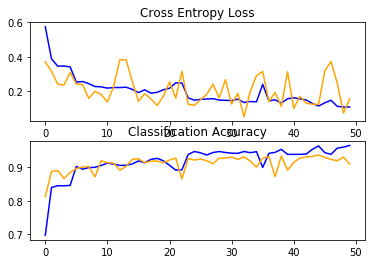

In [4]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = test_datagen.flow_from_directory('/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/validation/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [5]:
# run the test harness for evaluating a model
def run_build_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
	# save model
	model.save('final_model.h5')

# entry point, run the test harness
run_build_harness()

Found 3000 images belonging to 2 classes.


In [6]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/kaggle/input/sample-image/sample_image.jpg')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[2.391904e-06]
